# Identifying Milk vs NoMilk receipts by Deep Learning

Convolutional Neural Network

In [ ]:
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import adam
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
#os.chdir('B:\\Travel\\US\\USF_Course\\DataScienceProgramming\\DSP-Project-master\\DSP-Project-master')

#Please update the local directory where data are present
file_path=''
os.chdir(file_path)

In [3]:
# Initialising the CNN
classifier = Sequential()

#NEWLY ADDED Dropout
#classifier.add(Dropout(0.25, input_shape=(128,128,3)))

# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (128, 128, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Pooling - NEWLY ADDED
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a third convolutional layer - NEWLY ADDED
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
#classifier.add(Dense(units = 128, activation = 'elu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))
#classifier.add(Dense(units = 1, activation = 'softmax'))

# Compiling the CNN
#classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

opt=tf.keras.optimizers.Adam(lr=0.001)
classifier.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])




In [8]:
train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

In [9]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [10]:
training_set = train_datagen.flow_from_directory('ourd/training_set', # relative path from working directoy
                                                 target_size = (128, 128),
                                                 batch_size = 50, class_mode = 'binary')

Found 27 images belonging to 2 classes.


In [11]:
valid_set = test_datagen.flow_from_directory('ourd/test_set', # relative path from working directoy
                                             target_size = (128, 128), 
                                             batch_size = 20, class_mode = 'binary')

Found 27 images belonging to 2 classes.


In [12]:
from tensorflow.keras.callbacks import EarlyStopping

# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

In [13]:
classifier.fit_generator(training_set,
                         steps_per_epoch = 40,
                         epochs = 5,
                         validation_data = valid_set,
                         validation_steps = 10, 
                         callbacks=[es])

Epoch 1/5
40/40 [==============================] - 72s 2s/step - loss: 0.2742 - accuracy: 0.8843 - val_loss: 1.5661 - val_accuracy: 0.6296
Epoch 2/5
40/40 [==============================] - 65s 2s/step - loss: 0.0252 - accuracy: 0.9926 - val_loss: 0.0254 - val_accuracy: 1.0000
Epoch 3/5
40/40 [==============================] - 67s 2s/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 8.6721e-04 - val_accuracy: 1.0000
Epoch 4/5
40/40 [==============================] - 68s 2s/step - loss: 7.9151e-04 - accuracy: 1.0000 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 00004: early stopping


In [14]:
# Load the data for making predictions

prediction_set = test_datagen.flow_from_directory('ourd/prediction_set', # relative path from working directoy
                                            target_size = (128, 128),batch_size=1,
                                            class_mode = 'binary')

Found 13 images belonging to 1 classes.


In [15]:
predictions=classifier.predict(prediction_set)

In [16]:
i=np.random.choice(len(predictions))

This image is predicted as publix


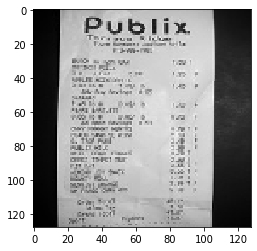

In [17]:
plt.imshow(prediction_set[i][0][0])
print("This image is predicted as","walmart" if predictions[i] > 0.5 else "publix")

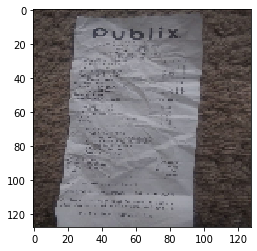

In [18]:
for i in range(13):
    plt.imshow(prediction_set[i][0][0])

In [19]:
for i in range(13):
    print("The image    "+ prediction_set.filenames[i] + "    "+ " is predicted as","walmart" if predictions[i] > 0.5 else "publix")

The image    predict_me\Receipt_publix_1.jpeg     is predicted as walmart
The image    predict_me\walmart_or_public12.jpg     is predicted as publix
The image    predict_me\walmart_or_public14.jpg     is predicted as publix
The image    predict_me\walmart_or_publix10.jpg     is predicted as publix
The image    predict_me\walmart_or_publix11.jpg     is predicted as publix
The image    predict_me\walmart_or_publix12.jpg     is predicted as walmart
The image    predict_me\walmart_or_publix13.jpg     is predicted as publix
The image    predict_me\walmart_or_publix4.jpg     is predicted as publix
The image    predict_me\walmart_or_publix5.jpg     is predicted as publix
The image    predict_me\walmart_or_publix6.jpg     is predicted as publix
The image    predict_me\walmart_or_publix7.jpg     is predicted as walmart
The image    predict_me\walmart_or_publix8.jpeg     is predicted as publix
The image    predict_me\walmart_or_publix9.png     is predicted as publix


In [20]:
print(predictions[i])

[0.01439779]


In [21]:
print(predictions)

[[9.9940050e-01]
 [4.6294937e-03]
 [2.9527547e-03]
 [2.9185522e-04]
 [9.2424569e-05]
 [6.6896564e-01]
 [5.2415885e-02]
 [1.8491018e-01]
 [4.6549267e-01]
 [3.1343205e-03]
 [9.9988127e-01]
 [2.6234248e-01]
 [1.4397789e-02]]


In [22]:
print(type(prediction_set))

<class 'keras_preprocessing.image.directory_iterator.DirectoryIterator'>


In [23]:
print(prediction_set.filenames[1])

predict_me\walmart_or_public12.jpg


# MILK or Not Milk

In [24]:
training_set = train_datagen.flow_from_directory('ourd1/training_set', # relative path from working directoy
                                                 target_size = (128, 128),
                                                 batch_size = 50, class_mode = 'binary')

Found 27 images belonging to 2 classes.


In [25]:
valid_set = test_datagen.flow_from_directory('ourd1/test_set', # relative path from working directoy
                                             target_size = (128, 128), 
                                             batch_size = 20, class_mode = 'binary')

Found 27 images belonging to 2 classes.


In [26]:
from tensorflow.keras.callbacks import EarlyStopping

# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

In [27]:
classifier.fit_generator(training_set,
                         steps_per_epoch = 40,
                         epochs = 5,
                         validation_data = valid_set,
                         validation_steps = 10, 
                         callbacks=[es])

Epoch 1/5
40/40 [==============================] - 65s 2s/step - loss: 0.3622 - accuracy: 0.8583 - val_loss: 0.1527 - val_accuracy: 0.9259
Epoch 2/5
40/40 [==============================] - 61s 2s/step - loss: 0.1784 - accuracy: 0.9213 - val_loss: 0.0613 - val_accuracy: 1.0000
Epoch 3/5
40/40 [==============================] - 62s 2s/step - loss: 0.1219 - accuracy: 0.9509 - val_loss: 0.1820 - val_accuracy: 0.8889
Epoch 00003: early stopping


In [28]:
# Load the data for making predictions

prediction_set1 = test_datagen.flow_from_directory('ourd1/prediction_set', # relative path from working directoy
                                            target_size = (128, 128),batch_size=1,
                                            class_mode = 'binary')

Found 13 images belonging to 1 classes.


In [29]:
predictions1=classifier.predict(prediction_set1)

In [30]:
i=np.random.choice(len(predictions1))

This image is predicted as milk


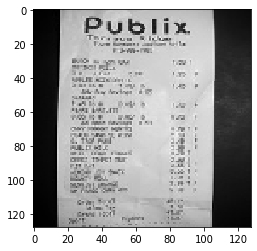

In [32]:
plt.imshow(prediction_set1[i][0][0])
print("This image is predicted as","milk" if predictions1[i] > 0.5 else "not milk")

The image    predict_me\Receipt_publix_1.jpeg     is predicted as milk
The image    predict_me\walmart_or_public12.jpg     is predicted as milk
The image    predict_me\walmart_or_public14.jpg     is predicted as milk
The image    predict_me\walmart_or_publix10.jpg     is predicted as milk
The image    predict_me\walmart_or_publix11.jpg     is predicted as not milk
The image    predict_me\walmart_or_publix12.jpg     is predicted as milk
The image    predict_me\walmart_or_publix13.jpg     is predicted as not milk
The image    predict_me\walmart_or_publix4.jpg     is predicted as not milk
The image    predict_me\walmart_or_publix5.jpg     is predicted as milk
The image    predict_me\walmart_or_publix6.jpg     is predicted as milk
The image    predict_me\walmart_or_publix7.jpg     is predicted as milk
The image    predict_me\walmart_or_publix8.jpeg     is predicted as not milk
The image    predict_me\walmart_or_publix9.png     is predicted as milk


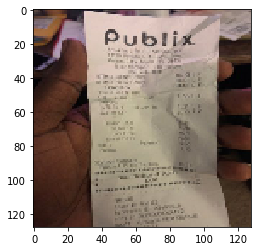

In [33]:
for i in range(13):
    plt.imshow(prediction_set1[i][0][0])
    print("The image    "+ prediction_set.filenames[i] + "    "+ " is predicted as","milk" if predictions1[i] > 0.5 else "not milk")

# Generate images artifically

This Augmented Dataset is for Milk and NoMilk receipts to overcome the problem of low volume of dataset

In [51]:
import os
import random
from scipy import ndarray

# image processing library
import skimage as sk
from skimage import transform
from skimage import util
from skimage import io


In [52]:
def random_rotation(image_array: ndarray):
    # pick a random degree of rotation between 25% on the left and 25% on the right
    random_degree = random.uniform(-25, 25)
    return sk.transform.rotate(image_array, random_degree)

def random_noise(image_array: ndarray):
    # add random noise to the image
    return sk.util.random_noise(image_array)

def horizontal_flip(image_array: ndarray):
    # horizontal flip doesn't need skimage, it's easy as flipping the image array of pixels !
    return image_array[:, ::-1]

In [53]:
# dictionary of the transformations we defined earlier
available_transformations = {
    #'rotate': random_rotation,
    'noise': random_noise,
    #'horizontal_flip': horizontal_flip
}

#folder_path = 'images/cat'
#num_files_desired = 10

In [54]:
# our folder path containing some images

#FIRST ITER:
#folder_path = 'B:\\Travel\\US\\USF_Course\\DataScienceProgramming\\DSP-Project-master\\DSP-Project-master\\generate\\Milk'

#SECOND ITER:
#folder_path = 'B:\\Travel\\US\\USF_Course\\DataScienceProgramming\\DSP-Project-master\\DSP-Project-master\\generate1\\Milk'

#Please update the local directory where data are present
file_path=''
os.chdir(file_path)

# the number of file to generate
num_files_desired = 1000

In [55]:
# find all files paths from the folder
images = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

num_generated_files = 0
while num_generated_files <= num_files_desired:
    # random image from the folder
    image_path = random.choice(images)
    # read image as an two dimensional array of pixels
    image_to_transform = sk.io.imread(image_path)
    # random num of transformation to apply
    num_transformations_to_apply = random.randint(1, len(available_transformations))

    num_transformations = 0
    transformed_image = None
    while num_transformations <= num_transformations_to_apply:
        # random transformation to apply for a single image
        key = random.choice(list(available_transformations))
        transformed_image = available_transformations[key](image_to_transform)
        num_transformations += 1

    new_file_path = '%s/augmented_image_%s.jpg' % (folder_path, num_generated_files)

    # write image to the disk
    io.imsave(new_file_path, transformed_image)
    num_generated_files += 1

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0

This Augmented Dataset is for NoMilk

In [56]:
# our folder path containing some images

#FIRST ITER:
#folder_path = 'B:\\Travel\\US\\USF_Course\\DataScienceProgramming\\DSP-Project-master\\DSP-Project-master\\generate\\NoMilk'

#SECOND ITER:
#folder_path = 'B:\\Travel\\US\\USF_Course\\DataScienceProgramming\\DSP-Project-master\\DSP-Project-master\\generate1\\NoMilk'

#Please update the local directory where data are present
file_path=''
os.chdir(file_path)

# the number of file to generate
num_files_desired = 1000

In [57]:
# find all files paths from the folder
images = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

num_generated_files = 0
while num_generated_files <= num_files_desired:
    # random image from the folder
    image_path = random.choice(images)
    # read image as an two dimensional array of pixels
    image_to_transform = sk.io.imread(image_path)
    # random num of transformation to apply
    num_transformations_to_apply = random.randint(1, len(available_transformations))

    num_transformations = 0
    transformed_image = None
    while num_transformations <= num_transformations_to_apply:
        # random transformation to apply for a single image
        key = random.choice(list(available_transformations))
        transformed_image = available_transformations[key](image_to_transform)
        num_transformations += 1

    new_file_path = '%s/augmented_image_%s.jpg' % (folder_path, num_generated_files)

    # write image to the disk
    io.imsave(new_file_path, transformed_image)
    num_generated_files += 1

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0

# Run CNN model on Augmented data set

In [78]:
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import adam
import matplotlib.pyplot as plt
import numpy as np
import os

In [79]:
# Initialising the CNN
classifier = Sequential()

#NEWLY ADDED Dropout
classifier.add(Dropout(0.40, input_shape=(128,128,3)))

# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (128, 128, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
#classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Pooling - NEWLY ADDED
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a third convolutional layer - NEWLY ADDED
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
#classifier.add(Dense(units = 128, activation = 'elu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))
#classifier.add(Dense(units = 1, activation = 'softmax'))

# Compiling the CNN
#classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

opt=tf.keras.optimizers.Adam(lr=0.001)
classifier.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])




In [80]:
train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

In [81]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [82]:
#os.chdir('B:\\Travel\\US\\USF_Course\\DataScienceProgramming\\DSP-Project-master\\DSP-Project-master\\')

#Please update the local directory where data are present
file_path=''
os.chdir(file_path)

In [83]:
#FIRST ITER:
#training_set = train_datagen.flow_from_directory('generate/training_set', # relative path from working directoy
#                                                 target_size = (128, 128),
#                                                 batch_size = 50, class_mode = 'binary')

#SECOND ITER:
training_set = train_datagen.flow_from_directory('generate1/training_set', # relative path from working directoy
                                                 target_size = (128, 128),
                                                 batch_size = 50, class_mode = 'binary')


Found 1420 images belonging to 2 classes.


In [84]:
#FIRST ITER
#valid_set = test_datagen.flow_from_directory('generate/test_set', # relative path from working directoy
#                                             target_size = (128, 128), 
#                                             batch_size = 20, class_mode = 'binary')
        
#SECOND ITER
valid_set = test_datagen.flow_from_directory('generate1/test_set', # relative path from working directoy
                                             target_size = (128, 128), 
                                             batch_size = 20, class_mode = 'binary')

Found 602 images belonging to 2 classes.


In [85]:
from tensorflow.keras.callbacks import EarlyStopping

# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

In [ ]:
classifier.fit_generator(training_set,
                         steps_per_epoch = 40,
                         epochs = 5,
                         validation_data = valid_set,
                         validation_steps = 10, 
                         callbacks=[es])

Epoch 1/5
40/40 [==============================] - 115s 3s/step - loss: 0.4033 - accuracy: 0.8294 - val_loss: 0.3502 - val_accuracy: 0.8450
Epoch 2/5
40/40 [==============================] - 157s 4s/step - loss: 0.1867 - accuracy: 0.9258 - val_loss: 0.3023 - val_accuracy: 0.8350
Epoch 3/5
40/40 [==============================] - 224s 6s/step - loss: 0.0939 - accuracy: 0.9685 - val_loss: 0.2931 - val_accuracy: 0.8350
Epoch 4/5
34/40 [========================>.....] - ETA: 15s - loss: 0.0661 - accuracy: 0.9787

In [72]:
# Load the data for making predictions
#FIRST ITER
#prediction_set2 = test_datagen.flow_from_directory('generate/prediction_set', # relative path from working directoy
#                                            target_size = (128, 128),batch_size=1,
#                                            class_mode = 'binary')

#SECOND ITER
prediction_set3 = test_datagen.flow_from_directory('generate1/prediction_set', # relative path from working directoy
                                            target_size = (128, 128),batch_size=1,
                                            class_mode = 'binary')

Found 10 images belonging to 1 classes.


In [ ]:
#FIRST ITER
#predictions2=classifier.predict(prediction_set2)

#SECOND ITER
predictions3=classifier.predict(prediction_set3)

In [ ]:
#FIRST ITER
#for i in range(9):
#    plt.imshow(prediction_set2[i][0][0])
#    print("The image    "+ prediction_set2.filenames[i] + "    "+ " is predicted as","milk" if predictions2[i] > 0.5 else "not milk")

#SECOND ITER
for i in range(9):
    plt.imshow(prediction_set3[i][0][0])
    print("The image    "+ prediction_set3.filenames[i] + "    "+ " is predicted as","milk" if predictions3[i] > 0.5 else "not milk")

# Using RNN - Identified for Future Work

In [47]:
import argparse
import random
import torch
import torch.backends.cudnn as cudnn
import torch.optim as optim
import torch.utils.data
from torch.autograd import Variable
import numpy as np
import os
#import utils
#import models.deformable_crnn as crnn
#from warpctc_pytorch import CTCLoss
import time
import torch.nn
#from dataset import TestDataset
#from dataset import LMDBDataset

In [49]:
parser = argparse.ArgumentParser()

parser.add_argument('--lmdb_paths', type=list,
                    default=['text_recognition_train/MJSYNTH_LMDB/', 'text_recognition_train/SYNTH_LMDB/'],
                    help='The list of paths to training data with LMDB format.')

parser.add_argument('--val_list', type=str, default='test_data/ICDAR13/gt.txt',
                    help='The list file of testing data names and annotations.')

parser.add_argument('--workers', type=int, default=8, help='The number of data loading workers.')
parser.add_argument('--batch_size', type=int, default=64, help='The input batch size.')
parser.add_argument('--img_h', type=int, default=64, help='The height of the input image to network.')
parser.add_argument('--img_w', type=int, default=200, help='The width of the input image to network.')
parser.add_argument('--colored', default=False, help='Whether to input colored images.')
parser.add_argument('--epochs', type=int, default=10, help='The number of epochs to train for.')
parser.add_argument('--lr', type=float, default=0.00005, help='The learning rate of the optimizer.')
parser.add_argument('--crnn', default='', help="The path to pre-trained crnn model.")
parser.add_argument('--output_path', default='./results/', help='Where to store samples and models.')

parser.add_argument('--display_interval', type=int, default=10, help='Interval to display the training information.')
parser.add_argument('--test_display_number', type=int, default=10, help='How many samples to display when testing.')
parser.add_argument('--val_interval', type=int, default=5000, help='The interval to validate the model.')
parser.add_argument('--save_interval', type=int, default=5000, help='The interval to save the model.')
parser.add_argument('--save_logfile', default=False, help='Whether to save the log file.')
parser.add_argument('--momentum', type=float, default=0.9, help='Momentum for SGD.')
parser.add_argument('--cuda', action='store_true', help='Whether to enable cuda.')
parser.add_argument('--manual_seed', type=int, default=None,
                    help='A fix seed, which will be randomly generated if set to None.')
parser.add_argument('--case_sensitive', default=False, help='Whether the model is case sensitive.')
parser.add_argument('--alphabet_insensitive', type=str, default='0123456789abcdefghijklmnopqrstuvwxyz',
                    help='The alphabet when using case insensitive mode.')
parser.add_argument('--alphabet sensitive', type=str,
                    default='0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ',
                    help='The alphabet when using case sensitive mode.')
opt = parser.parse_args()

usage: ipykernel_launcher.py [-h] [--lmdb_paths LMDB_PATHS]
                             [--val_list VAL_LIST] [--workers WORKERS]
                             [--batch_size BATCH_SIZE] [--img_h IMG_H]
                             [--img_w IMG_W] [--colored COLORED]
                             [--epochs EPOCHS] [--lr LR] [--crnn CRNN]
                             [--output_path OUTPUT_PATH]
                             [--display_interval DISPLAY_INTERVAL]
                             [--test_display_number TEST_DISPLAY_NUMBER]
                             [--val_interval VAL_INTERVAL]
                             [--save_interval SAVE_INTERVAL]
                             [--save_logfile SAVE_LOGFILE]
                             [--momentum MOMENTUM] [--cuda]
                             [--manual_seed MANUAL_SEED]
                             [--case_sensitive CASE_SENSITIVE]
                             [--alphabet_insensitive ALPHABET_INSENSITIVE]
                             [-

SystemExit: 2

In [ ]:
# Use cudnn
cudnn.benchmark = True

if torch.cuda.is_available() and not opt.cuda:
    print("WARNING: You have a CUDA device, so you should probably run with --cuda")


In [ ]:
if not os.path.exists(opt.output_path):
    os.system('mkdir {0}'.format(opt.output_path))

# Choose the alphabet
alphabet = opt.alphabet_sensitive if opt.case_sensitive else opt.alphabet_insensitive

# Set the seed
if opt.manual_seed is None:
    opt.manual_seed = random.randint(1, 10000)
random.seed(opt.manual_seed)
np.random.seed(opt.manual_seed)
torch.manual_seed(opt.manual_seed)

Dataset

In [ ]:
# Prepare training and testing data
train_datasets = [LMDBDataset(x) for x in opt.lmdb_paths]
train_dataset = torch.utils.data.ConcatDataset(train_datasets)

Train the model

In [ ]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=opt.batch_size, shuffle=True, sampler=None,
                                           num_workers=int(opt.workers),
                                           collate_fn=utils.AlignCollate(im_h=opt.img_h, im_w=opt.img_w))
print('Num of Training Images: %s' % len(train_dataset))

In [ ]:
test_dataset = TestDataset(list_file=opt.val_list, alphabet=alphabet,
                           transform=utils.ResizeNormalize((opt.img_w, opt.img_h)))
print('Num of Testing Images: %s' % len(test_dataset))

In [ ]:
nclass = len(alphabet) + 1
nc = 3 if opt.colored else 1

converter = utils.strLabelConverter(alphabet)
criterion = CTCLoss()

In [ ]:
# custom weights initialization called on crnn
def weights_init(m):
    classname = m.__class__.__name__
    if classname.find('Conv') != -1:
        m.weight.data.normal_(0.0, 0.02)
    elif classname.find('BatchNorm') != -1:
        m.weight.data.normal_(1.0, 0.02)
        m.bias.data.fill_(0)


crnn = crnn.DeformableCRNN(opt.img_h, nc, nclass)
crnn.apply(weights_init)

# Load pre-trained model if provided
if opt.crnn != '':
    print('Loading pretrained model from %s ...' % opt.crnn)
    if opt.cuda:
        crnn = torch.nn.DataParallel(crnn, device_ids=range(opt.gpu_number))
    crnn.load_state_dict(torch.load(opt.crnn))

image = torch.FloatTensor(opt.batch_size, 3, opt.img_h, opt.img_h)
text = torch.IntTensor(opt.batch_size * 5)
length = torch.IntTensor(opt.batch_size)

if opt.cuda:
    crnn.cuda()
    if crnn == '':
        crnn = torch.nn.DataParallel(crnn, device_ids=range(opt.gpu_number))
    image = image.cuda()
    criterion = criterion.cuda()

# loss averager
loss_avg = utils.averager()

# to use SGD optimizer
optimizer = optim.SGD(crnn.parameters(), lr=opt.lr, momentum=opt.momentum)

In [ ]:
# Validate the model during the training process
def val(net, dataset, criterion, best_accuracy, epoch, i, best_epoch, best_i, max_iter=100):
    print('Validating...')

    for para in crnn.parameters():
        para.requires_grad = False

    net.eval()
    data_loader = torch.utils.data.DataLoader(
        dataset, shuffle=True, batch_size=opt.batch_size, num_workers=int(opt.workers))
    val_iter = iter(data_loader)

    n_correct = 0
    loss_avg_ = utils.averager()

    max_iter = min(max_iter, len(data_loader))
    for j in range(max_iter):
        data = val_iter.next()
        j += 1
        cpu_images, cpu_texts, _ = data
        batch_size = cpu_images.size(0)
        utils.loadData(image, cpu_images)
        t, length_ = converter.encode(cpu_texts)
        utils.loadData(text, t)
        utils.loadData(length, length_)

        preds = crnn(image)
        preds_size = Variable(torch.IntTensor([preds.size(0)] * batch_size))
        cost_ = criterion(preds, text, preds_size, length) / batch_size
        loss_avg_.add(cost_)

        _, preds = preds.max(2)
        preds = preds.transpose(1, 0).contiguous().view(-1)
        sim_preds = converter.decode(preds.data, preds_size.data, raw=False)
        for pred, target in zip(sim_preds, cpu_texts):
            if pred == target.lower():
                n_correct += 1

    raw_preds = converter.decode(preds.data, preds_size.data, raw=True)[:opt.test_display_number]
    for raw_pred, pred, gt in zip(raw_preds, sim_preds, cpu_texts):
        print('%-20s => %-20s, gt: %-20s' % (raw_pred, pred, gt))

    accuracy = n_correct / float(max_iter * opt.batch_size)
    print('Test loss: %f, accuray: %f' % (loss_avg.val(), accuracy))
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_epoch = epoch
        best_i = i
    print('Best accuracy: ', best_accuracy, ' from ecpoch ', best_epoch, ', iteration ', best_i)
    return best_accuracy, best_epoch, best_i

In [ ]:
def train_batch(model, criterion, optimizer):
    data = train_iter.next()
    cpu_images, cpu_texts = data
    batch_size = cpu_images.size(0)
    utils.loadData(image, cpu_images)
    t, length_ = converter.encode(cpu_texts)
    utils.loadData(text, t)
    utils.loadData(length, length_)

    preds = model(image)
    preds_size = torch.IntTensor([preds.size(0)] * batch_size)
    loss = criterion(preds, text, preds_size, length) / batch_size
    crnn.zero_grad()
    loss.backward()
    optimizer.step()
    return loss


In [ ]:
if opt.save_logfile:
    log = open(opt.output_path + 'log.txt', 'w+')

start = time.time()
best_accuracy = 0
best_epoch = 0
best_i = 0
for epoch in range(opt.epochs):
    train_iter = iter(train_loader)
    i = 0
    time_train_batch = 0

    while i < len(train_loader):
        for p in crnn.parameters():
            p.requires_grad = True
        crnn.train()

        t1 = time.time()
        cost = train_batch(crnn, criterion, optimizer)
        t2 = time.time()
        loss_avg.add(cost)
        i += 1

        time_train_batch += (t2 - t1)

        if i % opt.display_interval == 0:
            time_train_batch = time_train_batch / opt.display_interval
            print('[%d/%d][%d/%d] Loss: %f Time: %.2f ms per batch' % (epoch, opt.epochs, i, len(train_loader),
                                                                       loss_avg.val(), time_train_batch * 1000))
            time_train_batch = 0
            if opt.save_logfile:
                log.write('[%d/%d][%d/%d] Loss: %f\n' % (epoch, opt.epochs, i, len(train_loader), loss_avg.val()))
            loss_avg.reset()

        if i % opt.val_interval == 0:
            best_accuracy, best_epoch, best_i = val(crnn, test_dataset, criterion, best_accuracy,
                                                    epoch, i, best_epoch, best_i)

        if i % opt.save_interval == 0:
            torch.save(crnn.state_dict(), '{0}/crnn_deform_{1}_{2}.pth'.format(opt.output_path, epoch, i))

end = time.time()
torch.save(crnn.state_dict(), 'crnn_deform_final.pth')
print('Program processed ', end - start, 's, ', (end - start)/60, 'min, ', (end - start)/3600, 'h')

if opt.save_logfile:
    log.write('Program processed ' + str(end - start) + 's, ' + str((end - start)/60) + 'min, ' +
              str((end - start)/3600) + 'h')
    log.close()